# Метод главных компонент PCA

Алгоритм машинного обучения БЕЗ учителя
Часто используется понижение размерности

Состоит в выяснении зависимости между признаками
В РСА выполняется качественная оценка этой зависимости путем поиска главных осей координат и их использования для описания наборов данных.

- +Простота интерпритации, эффективен с многомерными данными
- -Аномальные значения оказывают сильное влияние

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

iris = sns.load_dataset('iris')

In [26]:
data = iris[['petal_width', 'petal_length', 'species']]
data_v = data[data['species'] == 'versicolor']
data_v = data_v.drop(columns=['species'])

X = data_v['petal_width']
Y = data_v['petal_length']

p = PCA(n_components=2)
p.fit(data_v)

PCA(n_components=2)

(50, 2)
(50, 1)
(50, 2)


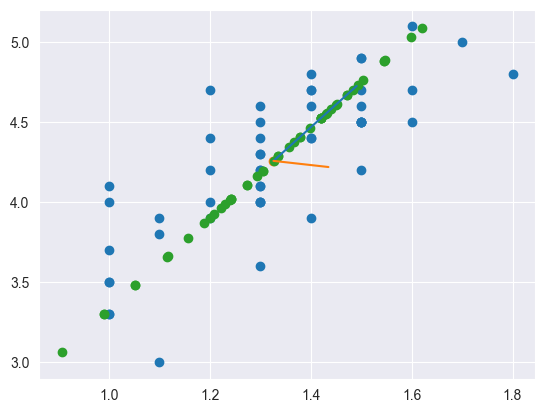

In [28]:
p1 = PCA(n_components=1)
p1.fit(data_v)

X_p = p1.transform(data_v)
X_p_new = p1.inverse_transform(X_p)
print(data_v.shape)
print(X_p.shape)
print(X_p_new.shape)


plt.scatter(X, Y)
plt.scatter(p.mean_[0], p.mean_[1])
plt.plot(
    [p.mean_[0], p.mean_[0] + p.components_[0][0]*np.sqrt(p.explained_variance_[0])],
    [p.mean_[1], p.mean_[1] + p.components_[0][1]*np.sqrt(p.explained_variance_[0])]
)

plt.plot(
    [p.mean_[0], p.mean_[0] + p.components_[1][0]*np.sqrt(p.explained_variance_[1])],
    [p.mean_[1], p.mean_[1] + p.components_[1][1]*np.sqrt(p.explained_variance_[1])]
)
plt.scatter(X_p_new[:, 0], X_p_new[:, 1])
plt.show()